Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

dados = pd.read_csv(fonte)

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')

## Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

In [43]:
#criada as medidas para nota LC
media_lc = dados_sem_nota_zero['NU_NOTA_LC'].mean()
mediana_lc= dados_sem_nota_zero['NU_NOTA_LC'].median()
moda_lc = dados_sem_nota_zero['NU_NOTA_LC'].mode()
moda_lc = moda_lc[0]

#criada as medidas para nota MT
media_mt = dados_sem_nota_zero['NU_NOTA_MT'].mean()
mediana_mt= dados_sem_nota_zero['NU_NOTA_MT'].median()
moda_mt = dados_sem_nota_zero['NU_NOTA_MT'].mode()
moda_mt = moda_mt[0]

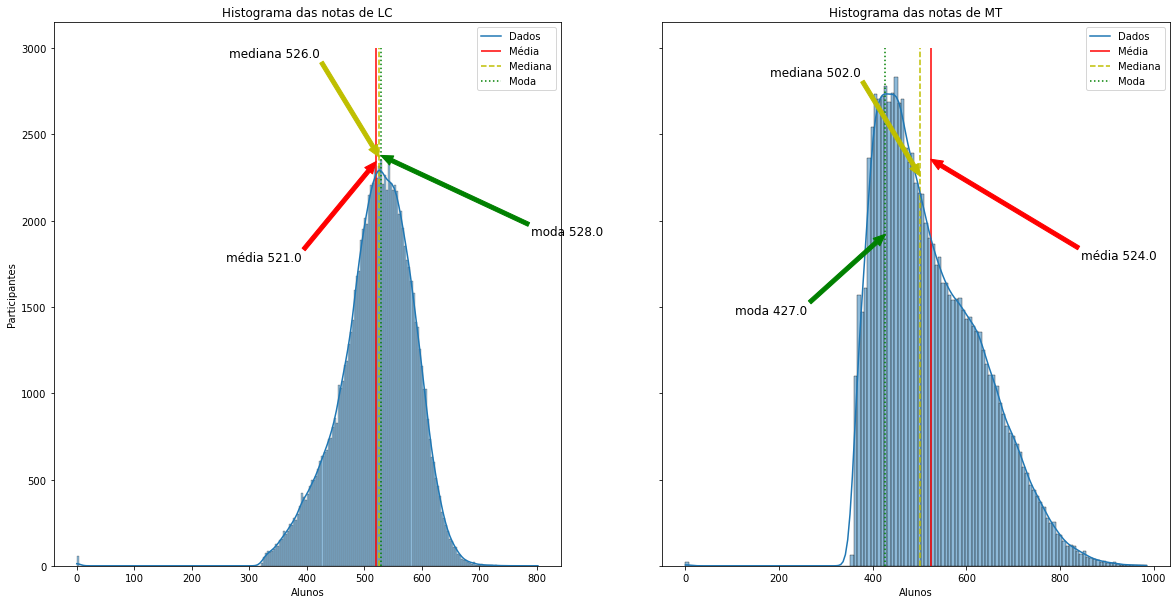

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10), sharey=True)

sns.histplot(ax=ax[0], data = dados_sem_nota_zero, x = "NU_NOTA_LC", kde=True)
ax[0].vlines(x = media_lc, ymin=0, ymax=3000, color = 'r', linestyles='solid')
ax[0].vlines(x = mediana_lc, ymin=0, ymax=3000, color = 'y', linestyles='dashed')
ax[0].vlines(x = moda_lc, ymin=0, ymax=3000, color = 'g', linestyles='dotted')
ax[0].set_title('Histograma das notas de LC')
ax[0].set_xlabel('Alunos')
ax[0].set_ylabel('Participantes')
ax[0].annotate('média '+str(np.round(media_lc,0)),
            xy=(media_lc, media_lc*4.5),
            xycoords='data',
            xytext=(-150,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='r'),
            fontsize=12)
ax[0].annotate('mediana '+str(np.round(mediana_lc,0)),
            xy=(mediana_lc, mediana_lc*4.5),
            xycoords='data',
            xytext=(-150,100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='y'),
            fontsize=12)
ax[0].annotate('moda '+str(np.round(moda_lc,0)),
            xy=(moda_lc, moda_lc*4.5),
            xycoords='data',
            xytext=(150,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='g'),
            fontsize=12)

ax[0].legend(labels = ['Dados','Média', 'Mediana', 'Moda'])






sns.histplot(ax=ax[1], data = dados_sem_nota_zero, x = "NU_NOTA_MT",  kde=True)
ax[1].vlines(x = media_mt, ymin=0, ymax=3000, color = 'r', linestyles='solid')
ax[1].vlines(x = mediana_mt, ymin=0, ymax=3000, color = 'y', linestyles='dashed')
ax[1].vlines(x = moda_mt, ymin=0, ymax=3000, color = 'g', linestyles='dotted')
ax[1].set_title('Histograma das notas de MT')
ax[1].set_xlabel('Alunos')
ax[1].annotate('média '+str(np.round(media_mt,0)),
            xy=(media_mt, media_mt*4.5),
            xycoords='data',
            xytext=(150,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='r'),
            fontsize=12)
ax[1].annotate('mediana '+str(np.round(mediana_mt,0)),
            xy=(mediana_mt, mediana_mt*4.5),
            xycoords='data',
            xytext=(-150,100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='y'),
            fontsize=12)
ax[1].annotate('moda '+str(np.round(moda_mt,0)),
            xy=(moda_mt, moda_mt*4.5),
            xycoords='data',
            xytext=(-150,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='g'),
            fontsize=12)
ax[1].legend(labels = ['Dados','Média', 'Mediana', 'Moda'])


plt.show()

## Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

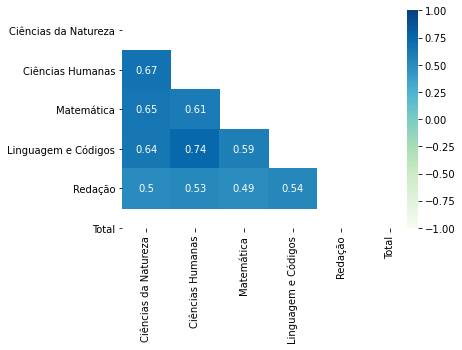

In [4]:
correlacao = dados_sem_nota_zero[provas].corr()

mask = np.triu(np.ones_like(correlacao, dtype=int))

labels = ["Ciências da Natureza", "Ciências Humanas", "Matemática", "Linguagem e Códigos", "Redação", "Total"]


sns.heatmap(correlacao, mask=mask, cmap="GnBu", center=0, annot=True, 
            vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)



plt.show()

Para melhorar podemos criar uma nova query onde não pegamos nenhuma nota zero e tentar ver se há alguma correlação.

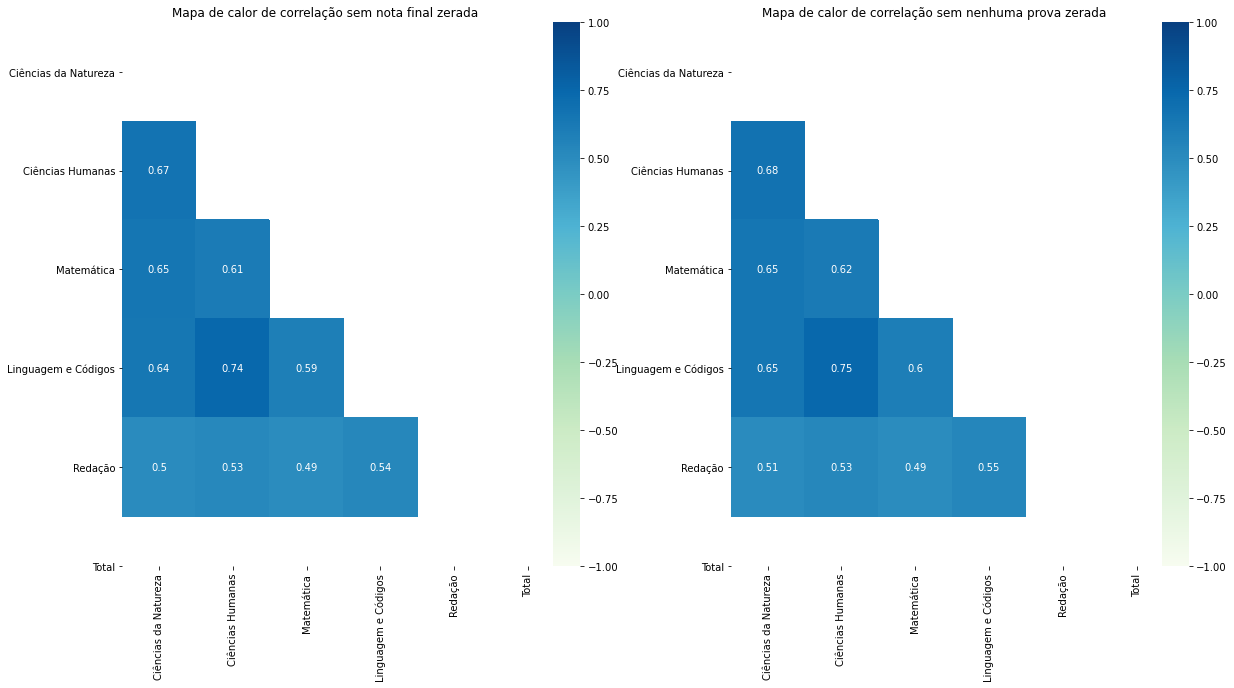

In [5]:
#retirando os 0 em todas as provas e todos os NaN
dados_sem_nenhuma_nota_zero = dados.query('NU_NOTA_TOTAL != 0 and NU_NOTA_CN !=0 and NU_NOTA_CH !=0 and NU_NOTA_LC !=0 and NU_NOTA_MT !=0 and NU_NOTA_TOTAL != "NaN" and NU_NOTA_CN !="NaN" and NU_NOTA_CH !="NaN" and NU_NOTA_LC !="NaN" and NU_NOTA_MT !="NaN"')
correlacao_sem_nenhum_zero = dados_sem_nenhuma_nota_zero[provas].corr()

mask_sem_nenhum_zero = np.triu(np.ones_like(correlacao_sem_nenhum_zero, dtype=int))

#comparativo 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))

sns.heatmap(ax=ax[0], data = correlacao, mask=mask, cmap="GnBu", center=0, annot=True, 
            vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
ax[0].set_title('Mapa de calor de correlação sem nota final zerada')

sns.heatmap(ax=ax[1], data = correlacao_sem_nenhum_zero, mask=mask_sem_nenhum_zero, cmap="GnBu", center=0, annot=True, 
            vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
ax[1].set_title('Mapa de calor de correlação sem nenhuma prova zerada')
plt.show()

Notamos que não houve nenhuma alteração nas métricas quando alteramos apenas os ranges das notas, foi muito baixo 0.01 de correlação modificada.

Assim, as notas de algumas matérias zeradas e NaN não influenciam tanto nas correlações entre elas.

## Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

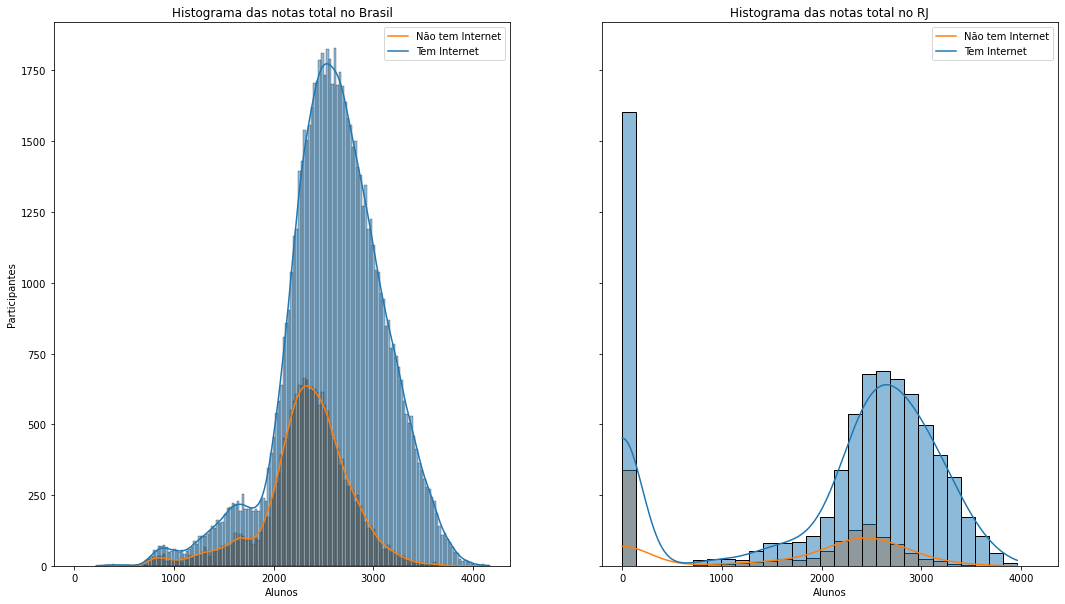

In [6]:
#filtragem do dataset para estado de residência do RJ
dados_sem_nota_zero_rj = dados.query('SG_UF_RESIDENCIA == "RJ"') 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,10), sharex=True, sharey=True)

sns.histplot(ax = ax[0],data = dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
ax[0].set_title('Histograma das notas total no Brasil')
ax[0].set_xlabel('Alunos')
ax[0].set_ylabel('Participantes')
ax[0].legend(labels = ['Não tem Internet','Tem Internet'])

sns.histplot(ax = ax[1],data = dados_sem_nota_zero_rj, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)
ax[1].set_title('Histograma das notas total no RJ')
ax[1].set_xlabel('Alunos')
ax[1].legend(labels = ['Não tem Internet','Tem Internet'])
plt.show()

Verificando a amostragem e comparando os dados do Rio com os dados do Brasil, nas análises da aula 3. No primeiro histograma, podemos ver que percorremos o mesmo padrão de disperção das notas do Brasil e tivemos muitas notas zero no Rio de Janeiro as quais são relevantes.

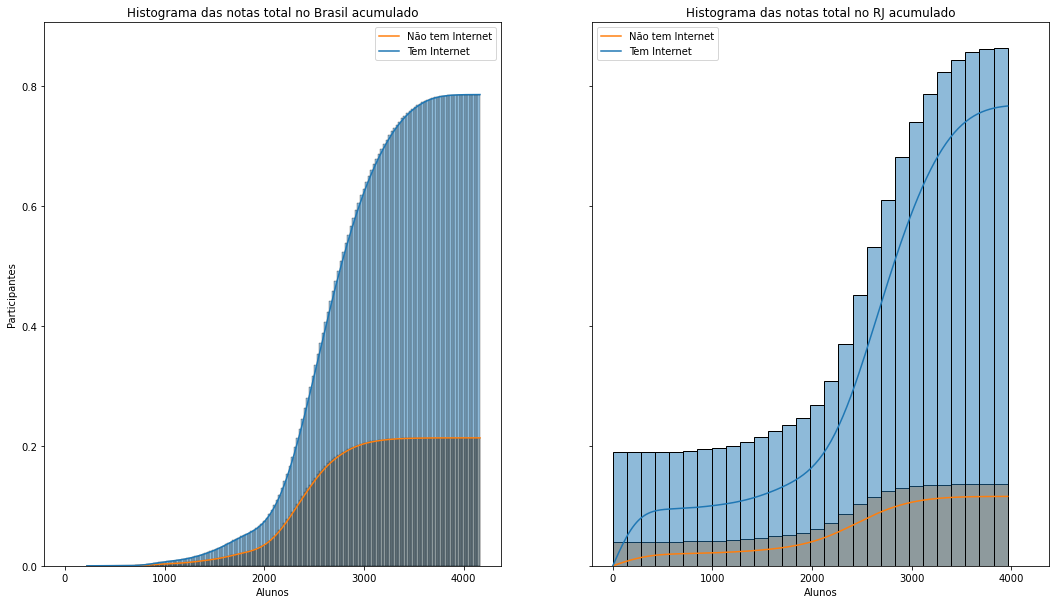

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,10), sharex=True, sharey=True )

sns.histplot(ax = ax[0], data = dados_sem_nota_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
ax[0].set_title('Histograma das notas total no Brasil acumulado')
ax[0].set_xlabel('Alunos')
ax[0].set_ylabel('Participantes')
ax[0].legend(labels = ['Não tem Internet','Tem Internet'])

sns.histplot(ax = ax[1], data = dados_sem_nota_zero_rj, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)
ax[1].set_title('Histograma das notas total no RJ acumulado')
ax[1].set_xlabel('Alunos')
ax[1].legend(labels = ['Não tem Internet','Tem Internet'])

plt.show()

Na comparação acumulativa, vemos que a proporção de quem não tem internet é menor no Rio de Janeiro que no resto do país.

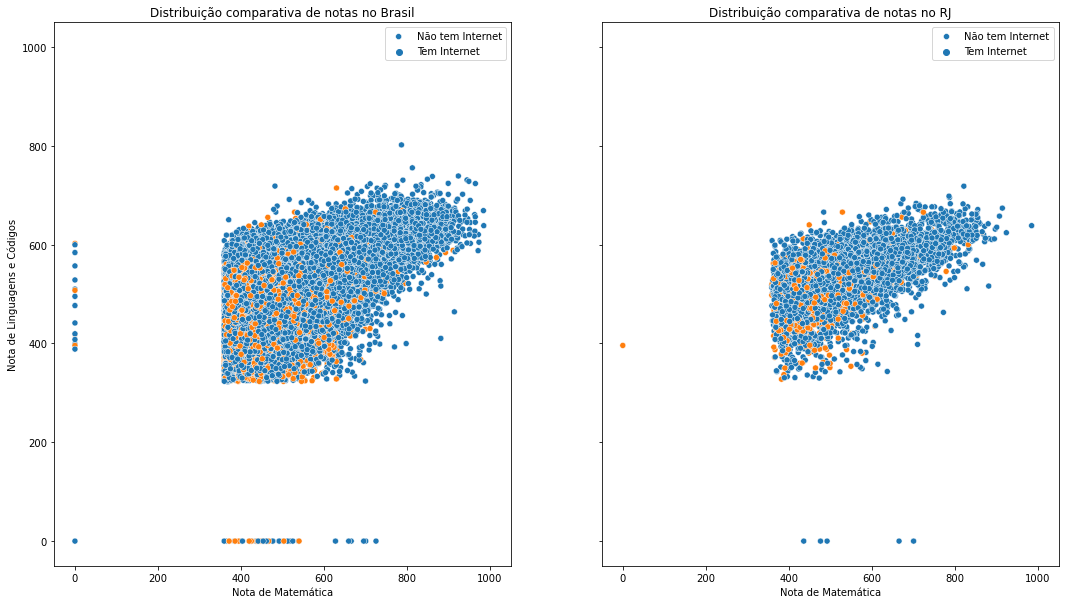

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,10), sharex=True, sharey=True )

sns.scatterplot(ax = ax[0], data = dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
ax[0].set_xlim((-50, 1050))
ax[0].set_ylim((-50, 1050))
ax[0].set_title('Distribuição comparativa de notas no Brasil')
ax[0].set_xlabel('Nota de Matemática')
ax[0].set_ylabel('Nota de Linguagens e Códigos')
ax[0].legend(labels = ['Não tem Internet','Tem Internet'])


sns.scatterplot(ax = ax[1], data = dados_sem_nota_zero_rj, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
ax[1].set_xlim((-50, 1050))
ax[1].set_ylim((-50, 1050))
ax[1].set_title('Distribuição comparativa de notas no RJ')
ax[1].set_xlabel('Nota de Matemática')
ax[1].legend(labels = ['Não tem Internet','Tem Internet'])

plt.show()

Na comparação entre as notas de Linguagem e códigos e as notas de Matemática, podemos ver que no Rio as menores notas de Linguagens e Códigos e Matemática estão um pouco acima do Brasil.

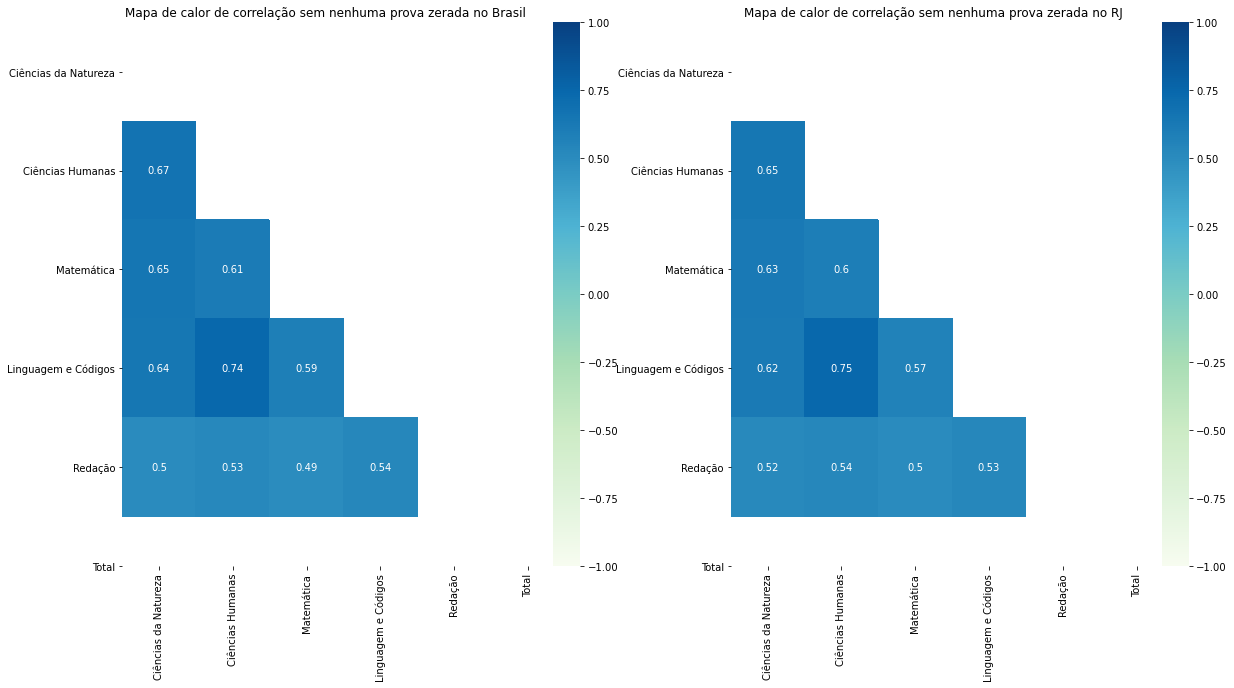

In [11]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao_rj = dados_sem_nota_zero_rj[provas].corr()

mask = np.triu(np.ones_like(correlacao, dtype=int))
mask_rj = np.triu(np.ones_like(correlacao_rj , dtype=int))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10) )

sns.heatmap(ax = ax[0], data = correlacao,  mask=mask, cmap="GnBu", center=0, annot=True,
           vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
ax[0].set_title('Mapa de calor de correlação sem nenhuma prova zerada no Brasil')

sns.heatmap(ax = ax[1], data = correlacao_rj, mask=mask_rj, cmap="GnBu", center=0, annot=True,
           vmin=-1, vmax=1, xticklabels=labels, yticklabels=labels)
ax[1].set_title('Mapa de calor de correlação sem nenhuma prova zerada no RJ')

plt.show()

No mapa de calor a relação entre as notas das provas, podemos ver que o Rio de Janeiro mantém a maior correlação do Brasil que é Linguagem e Códigos com Ciências Humanas.
Assim como a menor que é Matemática e Linguagem e Códigos.

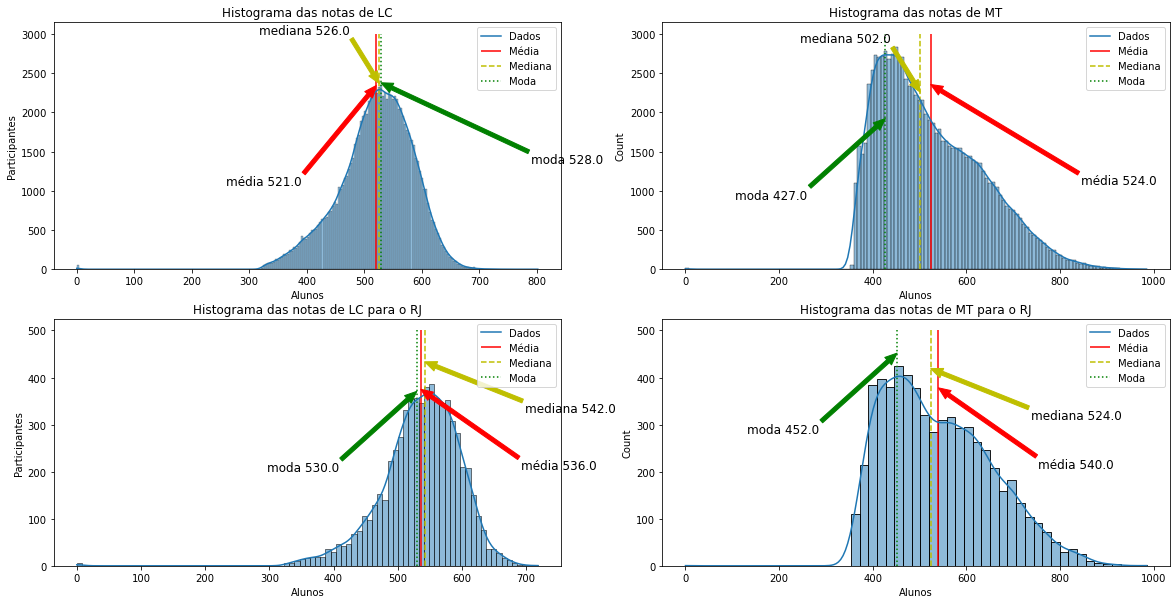

In [90]:

# medidas de todos o RJ para LC
media_lc_rj = dados_sem_nota_zero_rj['NU_NOTA_LC'].mean()
mediana_lc_rj = dados_sem_nota_zero_rj['NU_NOTA_LC'].median()
moda_lc_rj = dados_sem_nota_zero_rj['NU_NOTA_LC'].mode()
moda_lc_rj = moda_lc_rj[0]

# medidas de todos o RJ paraMT
media_mt_rj = dados_sem_nota_zero_rj['NU_NOTA_MT'].mean()
mediana_mt_rj = dados_sem_nota_zero_rj['NU_NOTA_MT'].median()
moda_mt_rj = dados_sem_nota_zero_rj['NU_NOTA_MT'].mode()
moda_mt_rj = moda_mt_rj[0]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (20,10))

sns.histplot(ax=ax[0,0], data = dados_sem_nota_zero, x = "NU_NOTA_LC", kde=True)
ax[0,0].vlines(x = media_lc, ymin=0, ymax=3000, color = 'r', linestyles='solid')
ax[0,0].vlines(x = mediana_lc, ymin=0, ymax=3000, color = 'y', linestyles='dashed')
ax[0,0].vlines(x = moda_lc, ymin=0, ymax=3000, color = 'g', linestyles='dotted')
ax[0,0].set_title('Histograma das notas de LC')
ax[0,0].set_xlabel('Alunos')
ax[0,0].set_ylabel('Participantes')
ax[0,0].annotate('média '+str(np.round(media_lc,0)),
            xy=(media_lc, media_lc*4.5),
            xycoords='data',
            xytext=(-150,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='r'),
            fontsize=12)
ax[0,0].annotate('mediana '+str(np.round(mediana_lc,0)),
            xy=(mediana_lc, mediana_lc*4.5),
            xycoords='data',
            xytext=(-120,50),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='y'),
            fontsize=12)
ax[0,0].annotate('moda '+str(np.round(moda_lc,0)),
            xy=(moda_lc, moda_lc*4.5),
            xycoords='data',
            xytext=(150,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='g'),
            fontsize=12)
ax[0,0].legend(labels = ['Dados','Média', 'Mediana', 'Moda'])


sns.histplot(ax=ax[0,1], data = dados_sem_nota_zero, x = "NU_NOTA_MT",  kde=True)
ax[0,1].vlines(x = media_mt, ymin=0, ymax=3000, color = 'r', linestyles='solid')
ax[0,1].vlines(x = mediana_mt, ymin=0, ymax=3000, color = 'y', linestyles='dashed')
ax[0,1].vlines(x = moda_mt, ymin=0, ymax=3000, color = 'g', linestyles='dotted')
ax[0,1].set_title('Histograma das notas de MT')
ax[0,1].set_xlabel('Alunos')
ax[0,1].annotate('média '+str(np.round(media_mt,0)),
            xy=(media_mt, media_mt*4.5),
            xycoords='data',
            xytext=(150,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='r'),
            fontsize=12)
ax[0,1].annotate('mediana '+str(np.round(mediana_mt,0)),
            xy=(mediana_mt, mediana_mt*4.5),
            xycoords='data',
            xytext=(-120,50),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='y'),
            fontsize=12)
ax[0,1].annotate('moda '+str(np.round(moda_mt,0)),
            xy=(moda_mt, moda_mt*4.5),
            xycoords='data',
            xytext=(-150,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='g'),
            fontsize=12)
ax[0,1].legend(labels = ['Dados','Média', 'Mediana', 'Moda'])


sns.histplot(ax=ax[1,0], data = dados_sem_nota_zero_rj, x = "NU_NOTA_LC", kde=True)
ax[1,0].vlines(x = media_lc_rj, ymin=0, ymax=500, color = 'r', linestyles='solid')
ax[1,0].vlines(x = mediana_lc_rj, ymin=0, ymax=500, color = 'y', linestyles='dashed')
ax[1,0].vlines(x = moda_lc_rj , ymin=0, ymax=500, color = 'g', linestyles='dotted')
ax[1,0].set_title('Histograma das notas de LC para o RJ')
ax[1,0].set_xlabel('Alunos')
ax[1,0].set_ylabel('Participantes')
ax[1,0].annotate('média '+str(np.round(media_lc_rj,0)),
            xy=(media_lc_rj, media_lc_rj*0.7),
            xycoords='data',
            xytext=(100,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='r'),
            fontsize=12)
ax[1,0].annotate('mediana '+str(np.round(mediana_lc_rj,0)),
            xy=(mediana_lc_rj, mediana_lc_rj*0.8),
            xycoords='data',
            xytext=(100,-50),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='y'),
            fontsize=12)
ax[1,0].annotate('moda '+str(np.round(moda_lc_rj,0)),
            xy=(moda_lc_rj, moda_lc_rj*0.7),
            xycoords='data',
            xytext=(-150,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='g'),
            fontsize=12)
ax[1,0].legend(labels = ['Dados','Média', 'Mediana', 'Moda'])


sns.histplot(ax=ax[1,1], data = dados_sem_nota_zero_rj, x = "NU_NOTA_MT",  kde=True)
ax[1,1].vlines(x = media_mt_rj, ymin=0, ymax=500, color = 'r', linestyles='solid')
ax[1,1].vlines(x = mediana_mt_rj, ymin=0, ymax=500, color = 'y', linestyles='dashed')
ax[1,1].vlines(x = moda_mt_rj, ymin=0, ymax=500, color = 'g', linestyles='dotted')
ax[1,1].set_title('Histograma das notas de MT para o RJ')
ax[1,1].set_xlabel('Alunos')
ax[1,1].annotate('média '+str(np.round(media_mt_rj,0)),
            xy=(media_mt_rj, media_mt_rj*0.7),
            xycoords='data',
            xytext=(100,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='r'),
            fontsize=12)
ax[1,1].annotate('mediana '+str(np.round(mediana_mt_rj,0)),
            xy=(mediana_mt_rj, mediana_mt_rj*0.8),
            xycoords='data',
            xytext=(100,-50),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='y'),
            fontsize=12)
ax[1,1].annotate('moda '+str(np.round(moda_mt_rj,0)),
            xy=(moda_mt_rj, moda_mt_rj),
            xycoords='data',
            xytext=(-150,-80),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='g'),
            fontsize=12)
ax[1,1].legend(labels = ['Dados','Média', 'Mediana', 'Moda'])


plt.show()

Analisando a amostragem, notamos que a média de notas de Linguagens e Códigos e Matemática é maior que no Brasil, assim como a mediana e a moda.